In [13]:
import os
import numpy as np

from src.qm_utils.lattice.lattice import Lattice2D
from src.qm_utils.lattice.brillouin_zone import BrillouinZone2D

import matplotlib.pyplot as plt

from src.acband import hole_dispersion

In [ ]:
K = 0.8
# m = 3

sqrt3 = 3.0 ** 0.5
a_M = 1
# lB = ((sqrt3 / (4 * m * np.pi)) ** 0.5) * a_M
lB = ((sqrt3 / (4 * np.pi)) ** 0.5) * a_M


e1 = np.array([1, 0])
e2 = np.array([0, 1])
a1 = a_M * e2
a2 = a_M * ((-sqrt3 / 2) * e1 + (1 / 2) * e2)
lattice = Lattice2D(np.stack([a1, a2]))
recip_lattice = lattice.reciprocal()

In [5]:

b1, b2 = lattice.reciprocal_lattice_vectors
b3 = -(b1 + b2)

c1 = (1 / 3) * (b1 - b2)
c2 = (1 / 3) * (b1 - b3)
c3 = (1 / 3) * (b2 - b3)

sample_lattice = Lattice2D(np.stack([c1 / 20, c2 / 20]))
bz = BrillouinZone2D(lattice, sample_lattice)

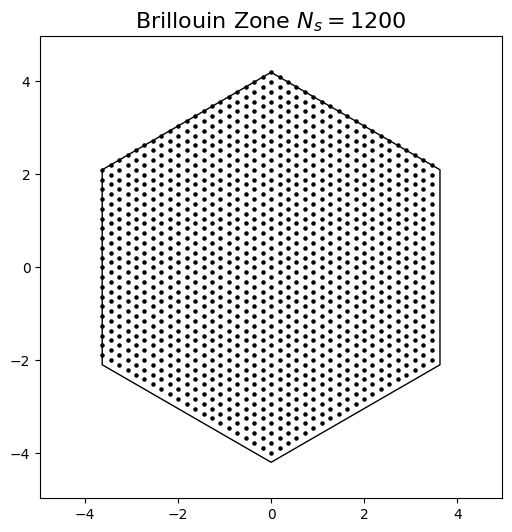

In [11]:
b = (4 * np.pi) / (a_M * sqrt3)
R = b / sqrt3
thetas = np.linspace(np.pi / 2, 5 * np.pi / 2, 7)
hexagon_x = R * np.cos(thetas)
hexagon_y = R * np.sin(thetas)

k_points = bz.k_points

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.set_title(f"Brillouin Zone $N_s={bz.N_s}$", fontsize=16)
ax.set_aspect('equal')
k_x = k_points[:, 0]
k_y = k_points[:, 1]
ax.plot(hexagon_x, hexagon_y, color='k', linewidth=1)
ax.scatter(k_x, k_y, s=5, c='k')
# for i in range(bz.N_s):
#     x = k_x[i]
#     y = k_y[i]
#     ax.text(x, y, f"{i}", fontsize=8, color="w", ha='center', va='center')
ax.set_xlim(-36 / b, 36 / b)
ax.set_ylim(-36 / b, 36 / b)
plt.show()

In [ ]:
K_func_args = (K, b1, b2, b3)
K_func = partial(K_func1, args=K_func_args)

hole_dispersion(
    bz,

)